In [2]:
!pip install missingno

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df_gs = pd.read_csv('C:/gong_test/강서구.csv', encoding='euc-kr')

In [64]:
df_gs.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,입지지수,공원이름
0,0,0.5,0.20,0.186977,0.25,0.202020,0.5,0.284688,이 수
1,1,0.0,0.28,0.186977,0.00,0.323232,1.0,0.136673,백 합1
2,2,0.0,0.34,0.186977,0.00,0.333333,0.5,0.134380,아리수
3,3,0.5,0.46,0.425843,0.50,0.454545,0.5,0.477695,등 서
4,4,0.0,0.22,0.425843,0.00,0.121212,0.5,0.131361,백 석


In [65]:
df_gs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [66]:
df_gs.head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,입지지수,공원이름
0,0.5,0.20,0.186977,0.25,0.202020,0.5,0.284688,이 수
1,0.0,0.28,0.186977,0.00,0.323232,1.0,0.136673,백 합1
2,0.0,0.34,0.186977,0.00,0.333333,0.5,0.134380,아리수
3,0.5,0.46,0.425843,0.50,0.454545,0.5,0.477695,등 서
4,0.0,0.22,0.425843,0.00,0.121212,0.5,0.131361,백 석


In [67]:
from sklearn.decomposition import PCA

In [68]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df_gs.drop(['공원이름'], axis=1).values # 독립변인들의 value값만 추출
y = df_gs['공원이름'].values # 종속변인 추출
x = StandardScaler().fit_transform(x)
features=['지하철역수','버스정류장수','유동인구비율','복지시설','의료기관','도서관','입지지수']
pd.DataFrame(x, columns=features).head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,입지지수
0,0.857749,-0.908543,-1.231381,0.438931,-0.373476,-0.136590,-0.103036
1,-0.722315,-0.473932,-1.231381,-0.658397,0.147653,1.297601,-0.984310
2,-0.722315,-0.147974,-1.231381,-0.658397,0.191081,-0.136590,-0.997962
3,0.857749,0.503941,-0.559167,1.536259,0.712209,-0.136590,1.046115
4,-0.722315,-0.799890,-0.559167,-0.658397,-0.720895,-0.136590,-1.015935


In [74]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [70]:
principalDf.head()

,principal component1,principal component2
0,-0.362911,-1.430749
1,-1.149867,0.092947
2,-1.520588,-0.066625
3,1.566216,-0.393625
4,-1.709936,-0.262469


In [71]:
pca.explained_variance_ratio_

array([0.48211924, 0.17407086])

In [72]:
sum(pca.explained_variance_ratio_)

0.6561900989482701

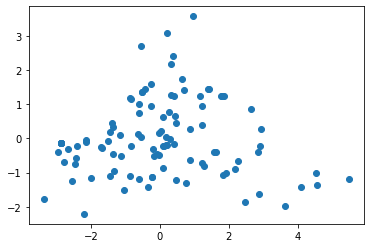

In [75]:
plt.scatter(principalDf["principal component1"],principalDf["principal component2"])